<a href="https://colab.research.google.com/github/chiruvishal/MajorProject/blob/main/explinablemodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud


In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [4]:
# Load your labeled dataset
df = pd.read_csv("labeled-dataset.csv")


In [5]:
chatgpt_text = df[df['label'] == 'ChatGPT']['text'].values
human_text = df[df['label'] == 'Human']['text'].values


In [6]:
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


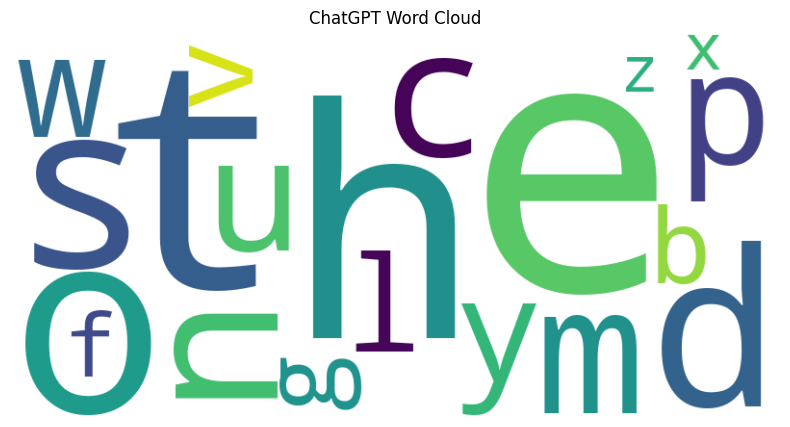

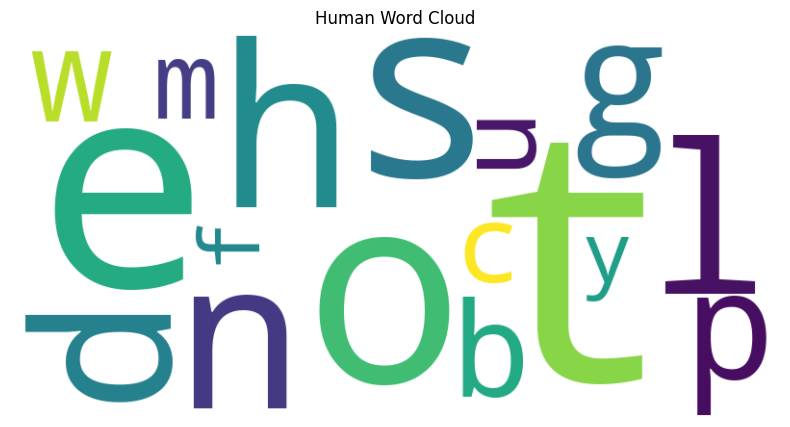

In [8]:
chatgpt_text= "I bought this phone for my daughter and she said that she loves it. The phone arrived in what seemed to be perfect condition. The sim card slot is a regular size and not micro, which is exactly what I needed. Otherwise, I would have had to buy a micro sim kit. I am very happy with my purchase."
human_text="The mobile is Ok but in the description said that it is able to work with 4G, that is wrong. I'll kindly suggest to delete this point form the page description"
create_word_cloud(chatgpt_text, "ChatGPT Word Cloud")
create_word_cloud(human_text, "Human Word Cloud")


In [9]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [10]:
# Load your labeled dataset
df = pd.read_csv("labeled-dataset.csv")


In [15]:
import torch
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize text and return input_ids as a list
def tokenize_text(text):
    encoding = tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
    return encoding['input_ids']

df['input_ids'] = df['text'].apply(tokenize_text)

# Create a tensor with padded sequences
X = torch.stack(tuple(df['input_ids'])).to(torch.long)


In [21]:
# Flatten the 3D input data into a 2D matrix
X_reshaped = X.reshape(X.shape[0], -1)  # Flattens along all dimensions except the first

# Now you can apply t-SNE on X_reshaped
tsne = TSNE(n_components=2, perplexity=1, n_iter=300)
X_tsne = tsne.fit_transform(X_reshaped)



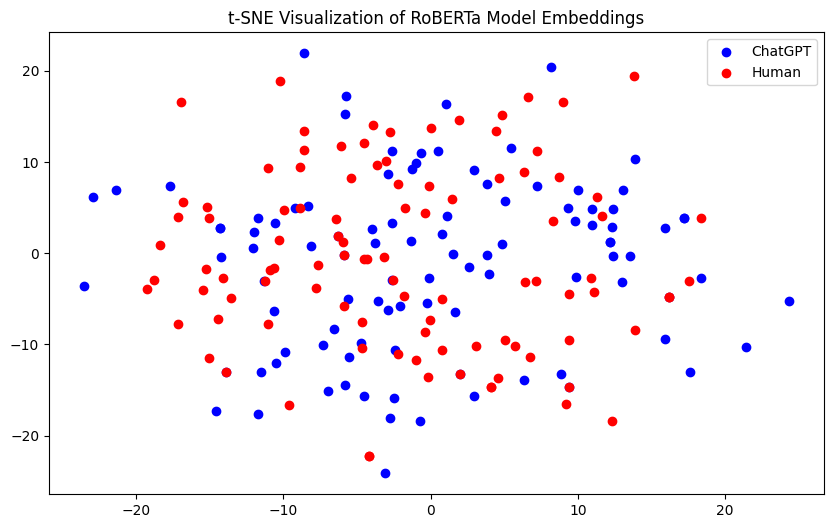

In [23]:
# Create a scatter plot to visualize the t-SNE embeddings
plt.figure(figsize=(10, 6))
sample_size = 100  # Reduce the data to a smaller subset, e.g., the first 100 data points
plt.scatter(X_tsne[:sample_size, 0], X_tsne[:sample_size, 1], c='b', label='ChatGPT')
plt.scatter(X_tsne[-sample_size:, 0], X_tsne[-sample_size:, 1], c='r', label='Human')
plt.title("t-SNE Visualization of RoBERTa Model Embeddings")
plt.legend()
plt.show()


In [24]:
!pip install transformers
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.3 MB/s eta 0:00:00


In [25]:
import shap
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch


In [28]:
model = RobertaForSequenceClassification.from_pretrained('drive/MyDrive/fine_tuned_roberta')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


In [29]:
text = "the phone good very , all buy"
encoding = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
input_ids = encoding['input_ids']


In [42]:


# Define a function to explain predictions for a list of texts
def explain_text(texts):
    # Wrap the single text in a list
    if not isinstance(texts, list):
        texts = [texts]

    # Tokenize the texts
    encoded_data = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=128)

    # Get input tensors
    input_ids = encoded_data['input_ids']
    attention_mask = encoded_data['attention_mask']

    # Create a SHAP explainer using a Text masker
    masker = shap.maskers.Text(tokenizer)
    explainer = shap.Explainer(model, masker=masker)

    # Explain the model's predictions for the input texts
    shap_values = explainer((input_ids, attention_mask))

    return shap_values

# Example single text
text_sample = "the phone good very, all buy"

# Explain the model's predictions for the input text
shap_values = explain_text([text_sample])


ValueError: ignored

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import shap

# Load your fine-tuned RoBERTa model and tokenizer
model = RobertaForSequenceClassification.from_pretrained('drive/MyDrive/fine_tuned_roberta')
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Define a prediction function
# Define a prediction function
def f(x):
    encoding = tokenizer(x, return_tensors="pt", padding=True, truncation=True, max_length=500, return_attention_mask=True)
    outputs = model(**encoding).logits
    scores = torch.nn.functional.softmax(outputs, dim=1)
    val = torch.log(scores[:, 1] / scores[:, 0])  # Calculate log-odds for binary classification
    return val.detach().numpy()

# Extract text samples and corresponding labels
text_samples = subset_df['text'].tolist()  # Keep it as a list of strings
labels = subset_df['label'].tolist()

# Modify text_samples to be a list of lists
text_samples = [[text] for text in text_samples]

# Build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

# Explain the model's predictions for the text samples
shap_values = explainer(text_samples)

# Visualize the SHAP values as desired




NameError: ignored

In [7]:
!pip install lime


In [4]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained('drive/MyDrive/fine_tuned_roberta')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


In [3]:
text_samples = ["The box is very simple and the charger is not a cube like apple.", "Good phone but when you call someone or get a call you can't talk in the phone. The person on the other line can't hear you.", "This seller is a total rip-off. They sold me an old, re-built iPhone that was pieced together from different components. The serial number had been changed, so Apple wouldn't honor the warranty. I had to buy a new iPhone from them. Don't buy from Ross Cellular!"]  # Add your text samples here


In [5]:
def predict_fn(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    return logits


In [9]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=["ChatGPT", "Human"])

explanations = []
for text in text_samples:
    explanation = explainer.explain_instance(text, predict_fn, num_features=10)
    explanations.append(explanation)


In [14]:
import json

explanations_data = []
for explanation in explanations:
    explanations_data.append(explanation.as_list())

# Save the explanations to a JSON file
with open('explanations.json', 'w') as f:
    json.dump(explanations_data, f)


Explanation for Text Sample 1 - True Class: -1.283240556716919


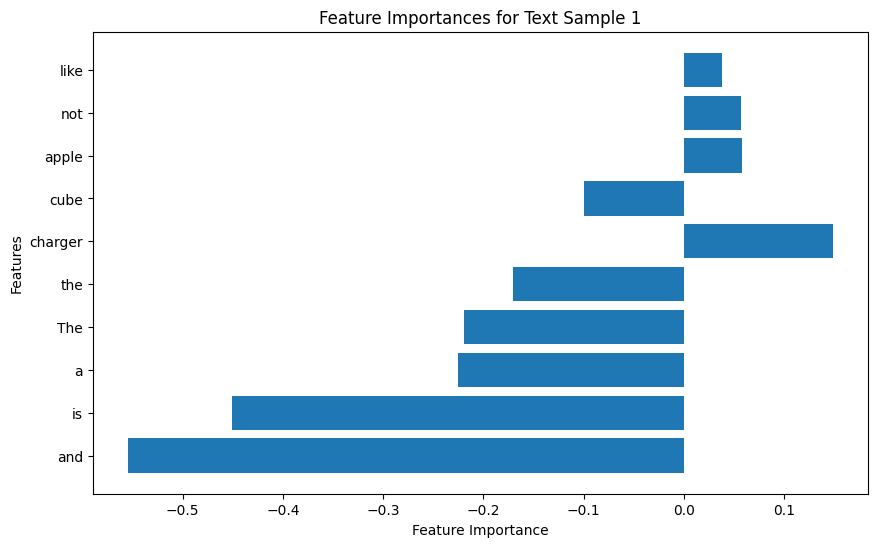

Explanation for Text Sample 2 - True Class: 1.256913185119629


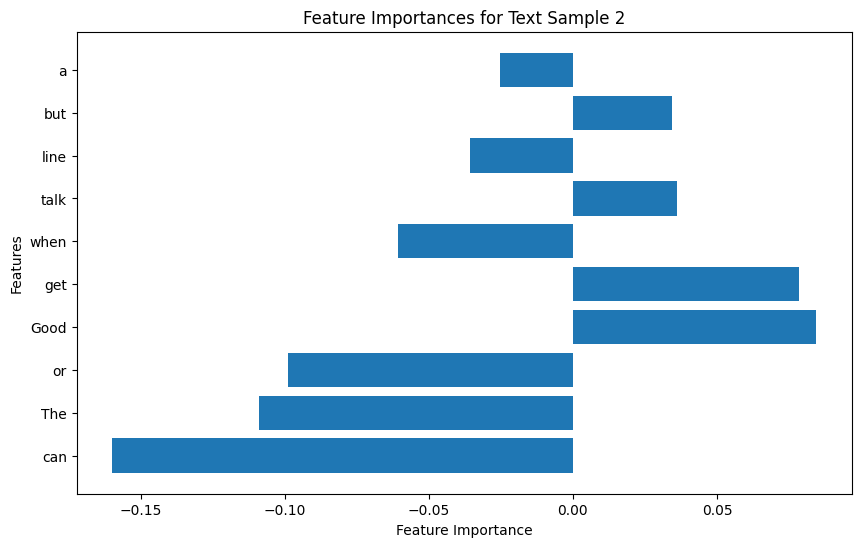

Explanation for Text Sample 3 - True Class: -1.8871302604675293


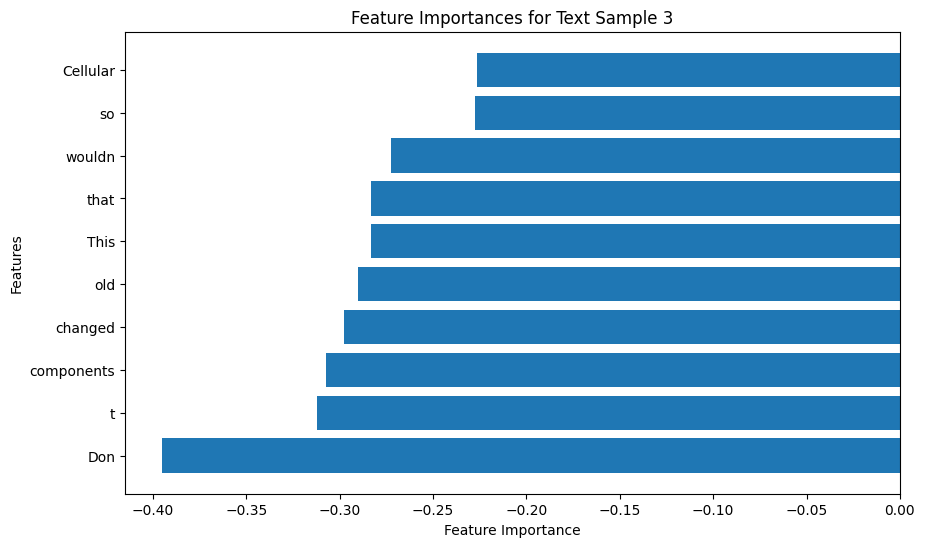

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of features to display
num_features = 10

# Iterate over explanations
for i, explanation in enumerate(explanations):
    print(f"Explanation for Text Sample {i + 1} - True Class: {explanation.predict_proba[1]}")

    # Get feature names and importances
    feature_names = explanation.as_list(label=1)  # Use label 1 for "Human" class
    feature_names = feature_names[:num_features]  # Slice to limit to num_features
    feature_names, feature_importances = zip(*feature_names)

    # Create a horizontal bar chart to visualize feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(feature_names)), feature_importances, align='center')  # Use len(feature_names) as the number of features
    plt.yticks(np.arange(len(feature_names)), feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importances for Text Sample {i + 1}')
    plt.show()
